# Anwendung der linearen Regression: Ausrichtungsanalyse

**Lernziele**<br>

 - Transfer der linearen Regression auf Bildverarbeitung
 - Verständnis für die Methoden zur Ausreißerbeurteilung und -behandlung   

### Vorbereitung

**Pakete einladen**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 6)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
%matplotlib widget

pd.set_option('display.precision',2)
np.set_printoptions(precision=3)
plt.close()

**Einladen der Bilddaten**

In [2]:
data = pd.read_excel('../data/Datenbild.xlsx',sheet_name ="Grunddaten", header=None).to_numpy()

### Darstellung des Bildes

geladenes Array **datda** enthält 98x98 Bildpunkte [0;1] Kodierung

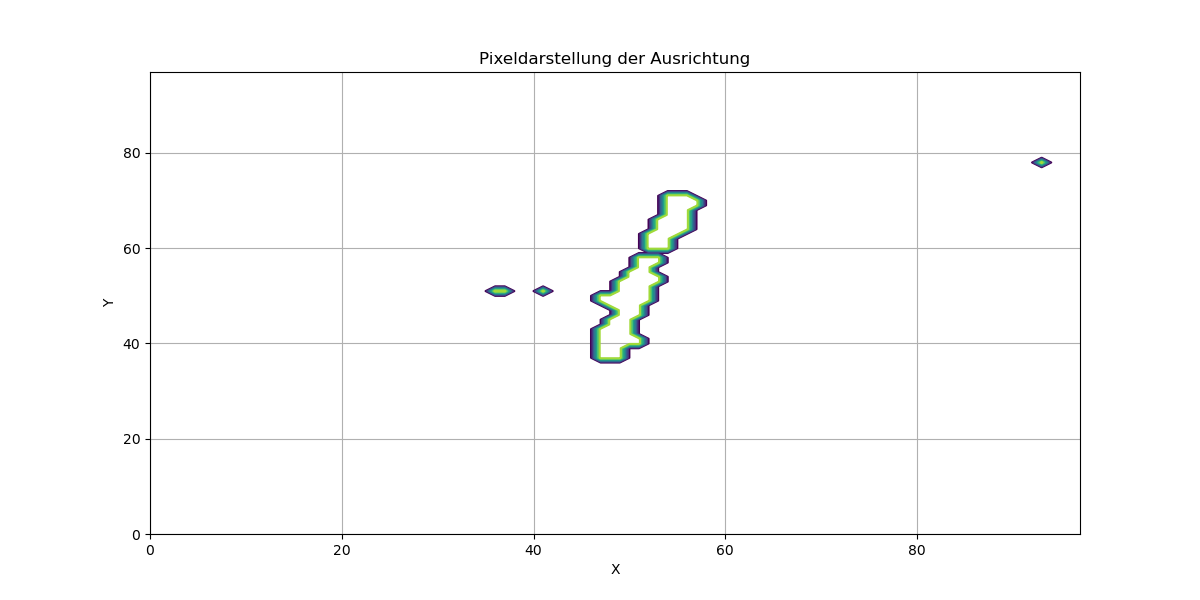

In [3]:
fig, ax = plt.subplots()
ax.contour(data)
ax.axes.grid()
ax.set(xlabel='X', ylabel='Y',title = "Pixeldarstellung der Ausrichtung");

### Transformation des Vektors


**Aufgabe**:  
Bereiten Sie die Eingangsgrößen (Vektoren x,y) für die Regression vor<br>  
Hinweis: 
 - Die Bildinformationen müssen transferiert werden in eine abhängige und eine unabhängige Variable
 - x = Spaltennummer(Datenpunkt)
 - y = Zeilennummer(Datenpunkt)

Zeilen und Spaltenindex erhalten Sie durch die numpy-Funktion **nonzero**.<br>  

Den Zeilenindex müssen Sie noch entsprechend 97 abziehen (ein Datenpunkt in der obersten Zeile hat index 0, soll aber entsprechend der Regression den Wert 97 erhalten) 


In [4]:
# your code goes here
y,x=np.nonzero(data)
y = 97 -y

<details>
    <summary>Click here to see a <strong>solution</strong>.</summary>

```python
y,x=np.nonzero(data)
y = 97 -y
```
</details>

### Datenpunkte in die zweidimensionale Ebene zeichnen

**Aufgabe**:  
Zeichnen Sie ein scatter-diagramm mit x,y und überprüfen die Übereinsstimmung mit der obigen Abbildung <br>  

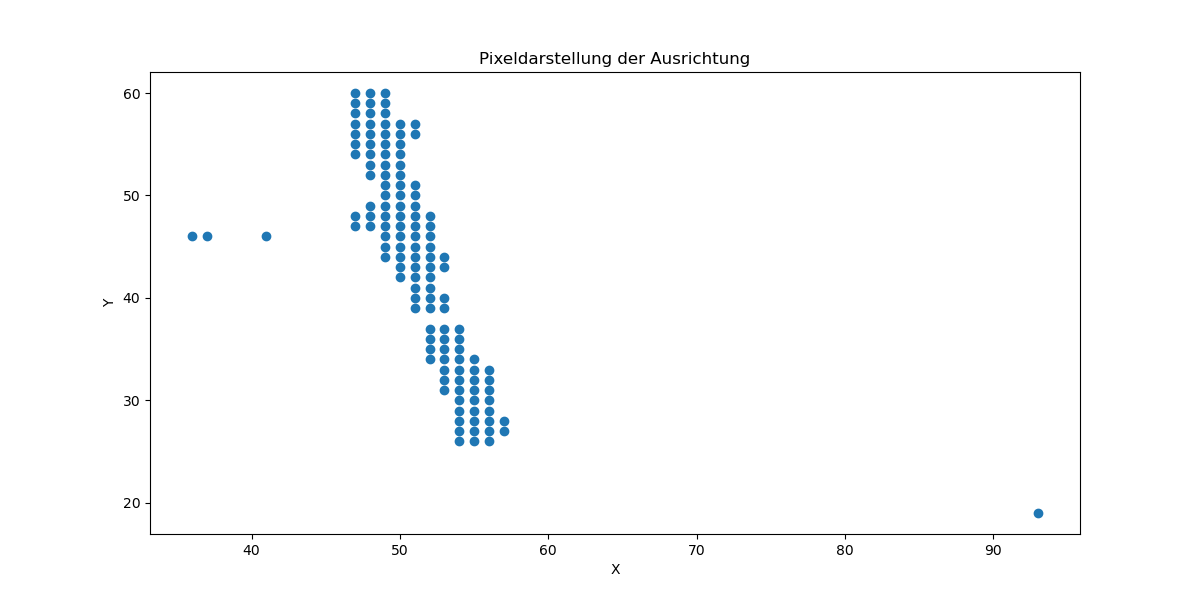

In [5]:
# your code goes here
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set(xlabel='X', ylabel='Y',title = "Pixeldarstellung der Ausrichtung");

<details>
    <summary>Click here to see a <strong>solution</strong>.</summary>

```python
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set(xlabel='X', ylabel='Y',title = "Pixeldarstellung der Ausrichtung");
```
</details>

### Berechnung der Steigung direkt aus den Daten

**Aufgabe:**

Führen Sie die Regression durch und speichern das Ausgabeobjekt in **results** ab. Geben sie mit print die Methode summary von Results aus.

Konsultieren Sie hierzu die hilfe des Paketes statsmodels:<br>

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS

class statsmodels.regression.linear_model.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)


Hinweise: 
- die api wurde oben schon als **sm** importiert.  
- Sie müssen x noch eine Konstante (Achsenabschnitt hinzufügen (sm.add_constant)

In [6]:
# your code goes here
xx = sm.add_constant(x)
results = sm.OLS(y, xx).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     86.26
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           5.59e-16
Time:                        11:00:40   Log-Likelihood:                -448.68
No. Observations:                 129   AIC:                             901.4
Df Residuals:                     127   BIC:                             907.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.0321      7.213     15.255      0.0

<details>
    <summary>Click here to see a <strong>solution</strong>.</summary>

```python
xx = sm.add_constant(x)
results = sm.OLS(y, xx).fit()
print(results.summary())
```
</details>

### Abbildung der Datenpunkte und Datengerade

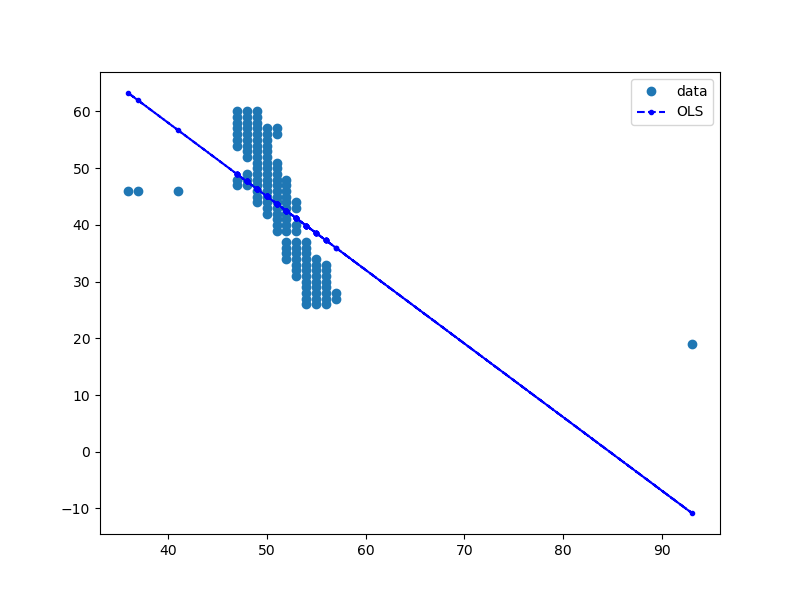

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x,y, "o", label="data")
ax.plot(x,results.fittedvalues, "b--.", label="OLS");
ax.legend();

### Bestimmung des Winkels in Abhängigkeit der Steigung

**Aufgabe:**

Bestimmen Sie den Winkel aus den Ergebnissen der Regression

<img src="../img/winkel.png" alt="winkel" width="800" >

In welcher Bandbreite liegt der Winkel bei Betrachtung des [2,5%, 97,5%] Intervalls (Daten können mit folgender Methode erhoben werden results.conf_int()[1])

In [8]:
# your code starts here
b_range=np.append(results.conf_int()[1],results.params[1])
winkels=np.zeros(3)
for i, b in enumerate(b_range):
    if b>0:
         winkels[i]= np.arctan(b)/np.pi*180;
    else:
        winkels[i]=180+np.arctan(b)/np.pi*180;
        
print(winkels)

[122.394 134.364 127.584]


<details>
    <summary>Click here to see a <strong>solution</strong>.</summary>

```python
b_range=np.append(results.conf_int()[1],results.params[1])
winkels=np.zeros(3)
for i, b in enumerate(b_range):
    if b>0:
         winkels[i]= np.arctan(b)/np.pi*180;
    else:
        winkels[i]=180+np.arctan(b)/np.pi*180;
        
print(winkels)
```
</details>

## Robuste Regression

### Betrachtung des Leverage der CooksDistance Dffits des Datenpunktes

**Aufgabe:**
Betrachten Sie die Ausgabe mdl1.Diagnostics und analysieren ob kritische Datenpunkte mit einem hohen Einfluss auf die Regression vorliegen
Finden Sie die relevanten Punkte, welche Sie bei einer erneuten Regression exkludieren

class statsmodels.stats.outliers_influence.OLSInfluence(results)

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS

Verwenden Sie die Angaben zum auffinden der Outlier entsprechend Folie @@  


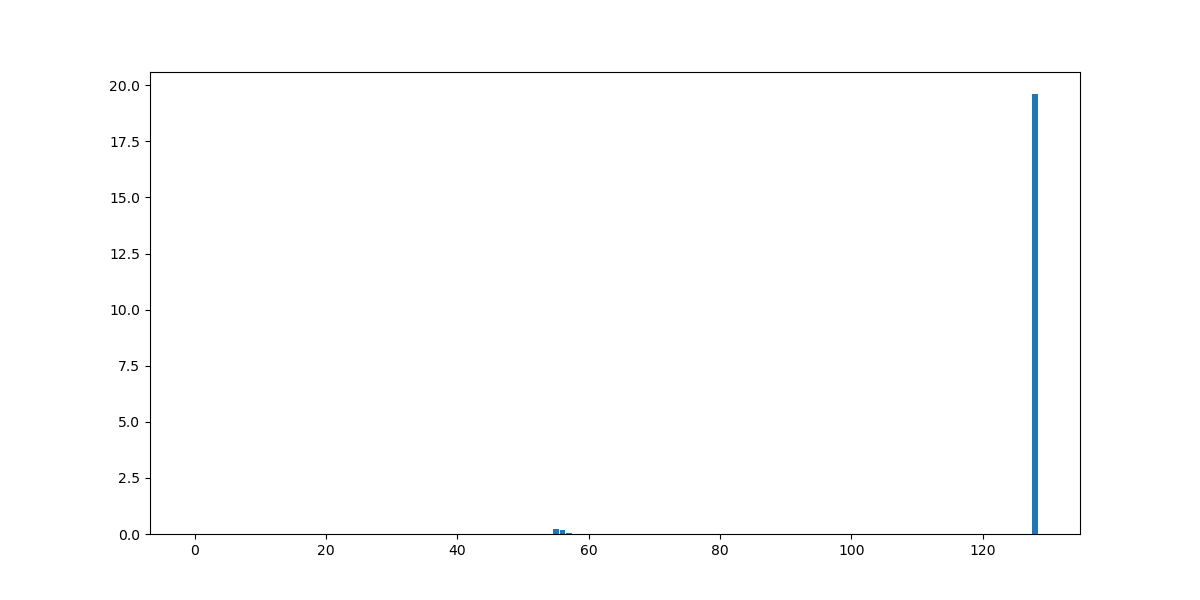

In [9]:
# your code starts here
infl=results.get_influence()

infl.cooks_distance[0]

#Berechnung der Regression ohne Datenpunkte mit übermäßigen Einfluss
fig, ax = plt.subplots()
ax.bar(np.arange(0,results.nobs),infl.cooks_distance[0])


cooksig = np.nonzero(infl.cooks_distance[0]>1)
DFFITSsig=np.nonzero(infl.dffits[0]>infl.dffits[1])

<details>
    <summary>Click here to see a <strong>solution</strong>.</summary>

```python
infl=results.get_influence()

infl.cooks_distance[0]

#Berechnung der Regression ohne Datenpunkte mit übermäßigen Einfluss
fig, ax = plt.subplots()
ax.bar(np.arange(0,results.nobs),infl.cooks_distance[0])


cooksig = np.nonzero(infl.cooks_distance[0]>1)
DFFITSsig=np.nonzero(infl.dffits[0]>infl.dffits[1])
```
</details>

### Berechnung der Steigung direkt aus den Daten mit robuster Regression

In [10]:
results_rob = sm.RLM(y, xx).fit()
print(results_rob.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  129
Model:                            RLM   Df Residuals:                      127
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 27 Mar 2023                                         
Time:                        11:00:40                                         
No. Iterations:                    23                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.8627      5.025     34.997      0.0

In [11]:
b_range_rob=np.append(results_rob.conf_int()[1],results_rob.params[1])
winkels_rob=np.zeros(3)
for i, b in enumerate(b_range_rob):
    if b>0:
         winkels_rob[i]= np.arctan(b)/np.pi*180;
    else:
        winkels_rob[i]=180+np.arctan(b)/np.pi*180;
        
print(winkels_rob)

[109.81  112.67  111.148]


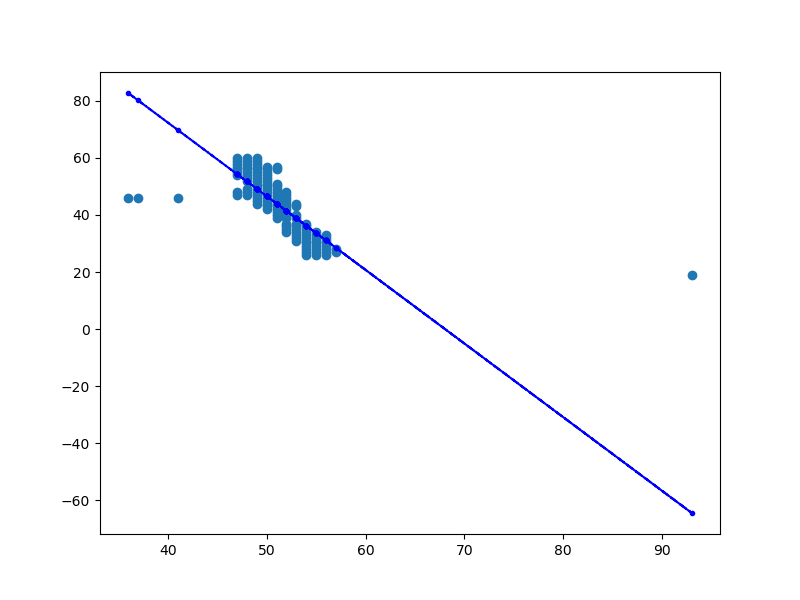

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x,y, "o", label="data")
ax.plot(x,results_rob.fittedvalues, "b--.", label="OLS")

## Quantils-Regression

Estimate a quantile regression model using iterative reweighted least squares.

In [13]:
mod = sm.QuantReg(y,xx)
res = mod.fit(q=0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3827
Model:                       QuantReg   Bandwidth:                       5.493
Method:                 Least Squares   Sparsity:                        14.75
Date:                Mon, 27 Mar 2023   No. Observations:                  129
Time:                        11:00:40   Df Residuals:                      127
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        188.7055      6.733     28.028      0.000     175.383     202.028
x1            -2.8341      0.131    -21.703      0.000      -3.093      -2.576
